In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('cosmetic.csv', encoding='latin1')


In [ ]:
df.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [ ]:
df.shape

(12615, 15)

In [ ]:
df.describe()


,price
count,12298.000000
mean,2281.180935
std,3158.690307
min,1.700000
25%,499.000000
50%,1307.200000
75%,2859.500000
max,94099.000000


In [ ]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
title-href,0
price,317
brand,0
ingredients,6015
form,0


In [ ]:
df = df.dropna()

**WHICH BRAND IS THE MOST PREFERRED?**

In [ ]:
country_brand_counts = df.groupby(['country', 'brand']).size().reset_index(name='count')

# most preffered brand by countries
top_brands_per_country = country_brand_counts.sort_values('count', ascending=False).drop_duplicates('country')

print(top_brands_per_country)

    country               brand  count
29    India  Sephora Collection    307
101     USA            Clinique     81


In [ ]:
print(top_brands_per_country.columns)


Index(['country', 'brand', 'count'], dtype='object')


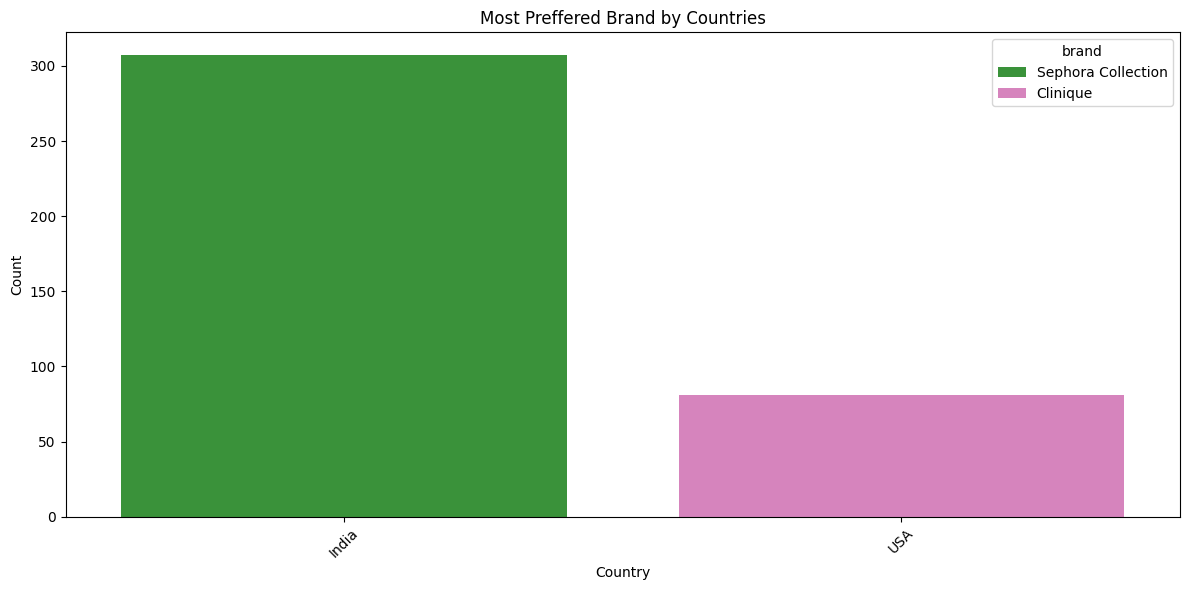

In [ ]:
#Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands_per_country, x='country', y='count', hue='brand', palette= ['#2ca02c', '#e377c2'])
plt.xticks(rotation=45)
plt.title("Most Preffered Brand by Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Price Analysis by Countries**

In [ ]:
#group by countries

price_by_country_category = df.groupby(['country', 'category'])['price'].mean().reset_index()

print(price_by_country_category)

  country  category        price
0   India      eyes  1982.202797
1   India      face  3395.145485
2   India      lips  2123.749186
3     USA      body  4327.854264
4     USA      eyes  1331.228690
5     USA      face  1984.584444
6     USA      hair  1792.711153
7     USA      lips  1416.588765
8     USA  skincare  2922.424403


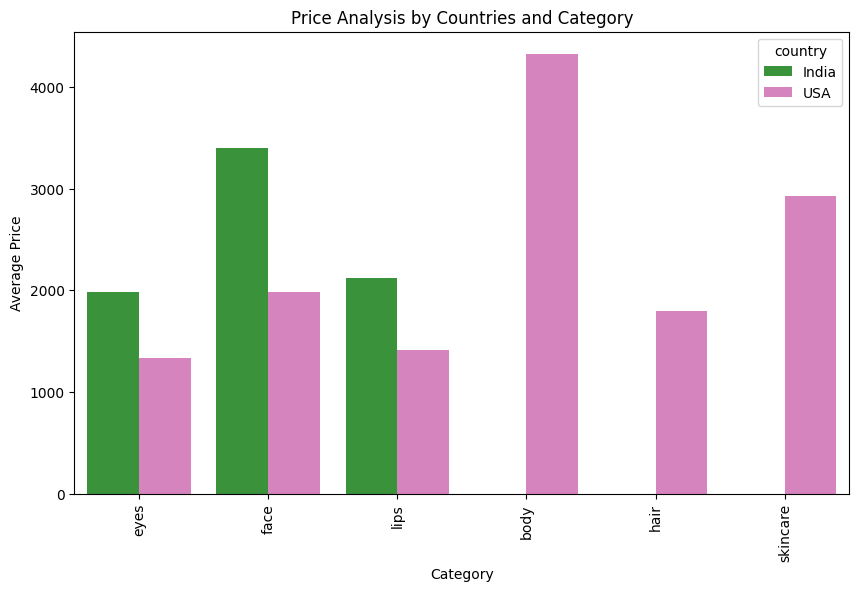

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='price', data=price_by_country_category, hue='country', palette= ['#2ca02c', '#e377c2'])
plt.xticks(rotation=90)
plt.title('Price Analysis by Countries and Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

**Rating Analysis by Countries**

In [ ]:
# check data types
df.dtypes


,0
product_name,object
website,object
country,object
category,object
subcategory,object
title-href,object
price,float64
brand,object
ingredients,object
form,object


In [ ]:
# convert non-numeric data to nan
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# drop the Non datas
df.dropna(subset=['rating'], inplace=True)


In [ ]:
#group for rating analysis

rating_by_country = df.groupby('country')['rating'].mean().reset_index()
print(rating_by_country)

  country    rating
0   India  3.850951
1     USA  4.383085


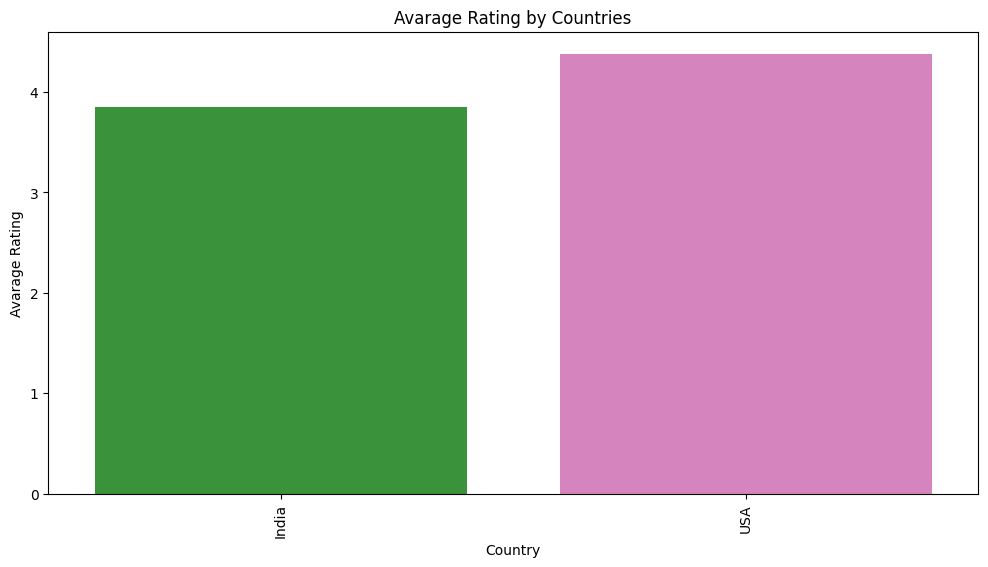

In [ ]:
#Visualization

plt.figure(figsize=(12,6))
sns.barplot(x='country', y='rating', data=rating_by_country,palette= ['#2ca02c', '#e377c2'] )
plt.xticks(rotation=90)
plt.title('Avarage Rating by Countries')
plt.xlabel('Country')
plt.ylabel('Avarage Rating')
plt.show()

**Rating Analysis by Countries and Product Types**

In [ ]:
rating_by_country_category = df.groupby(['country', 'category'])['rating'].mean().reset_index()
print(rating_by_country_category)

  country  category    rating
0   India      eyes  4.113543
1   India      face  3.319482
2   India      lips  4.185098
3     USA      body  4.417076
4     USA      eyes  4.130351
5     USA      face  4.256481
6     USA      hair  4.349882
7     USA      lips  4.390123
8     USA  skincare  4.448644


In [ ]:
print(rating_by_country_category.isna().sum())
rating_by_country_category.fillna(0, inplace=True)

country     0
category    0
rating      0
dtype: int64


In [ ]:
rating_pivot = rating_by_country_category.pivot_table(index='country', columns='category', values='rating', aggfunc='mean')


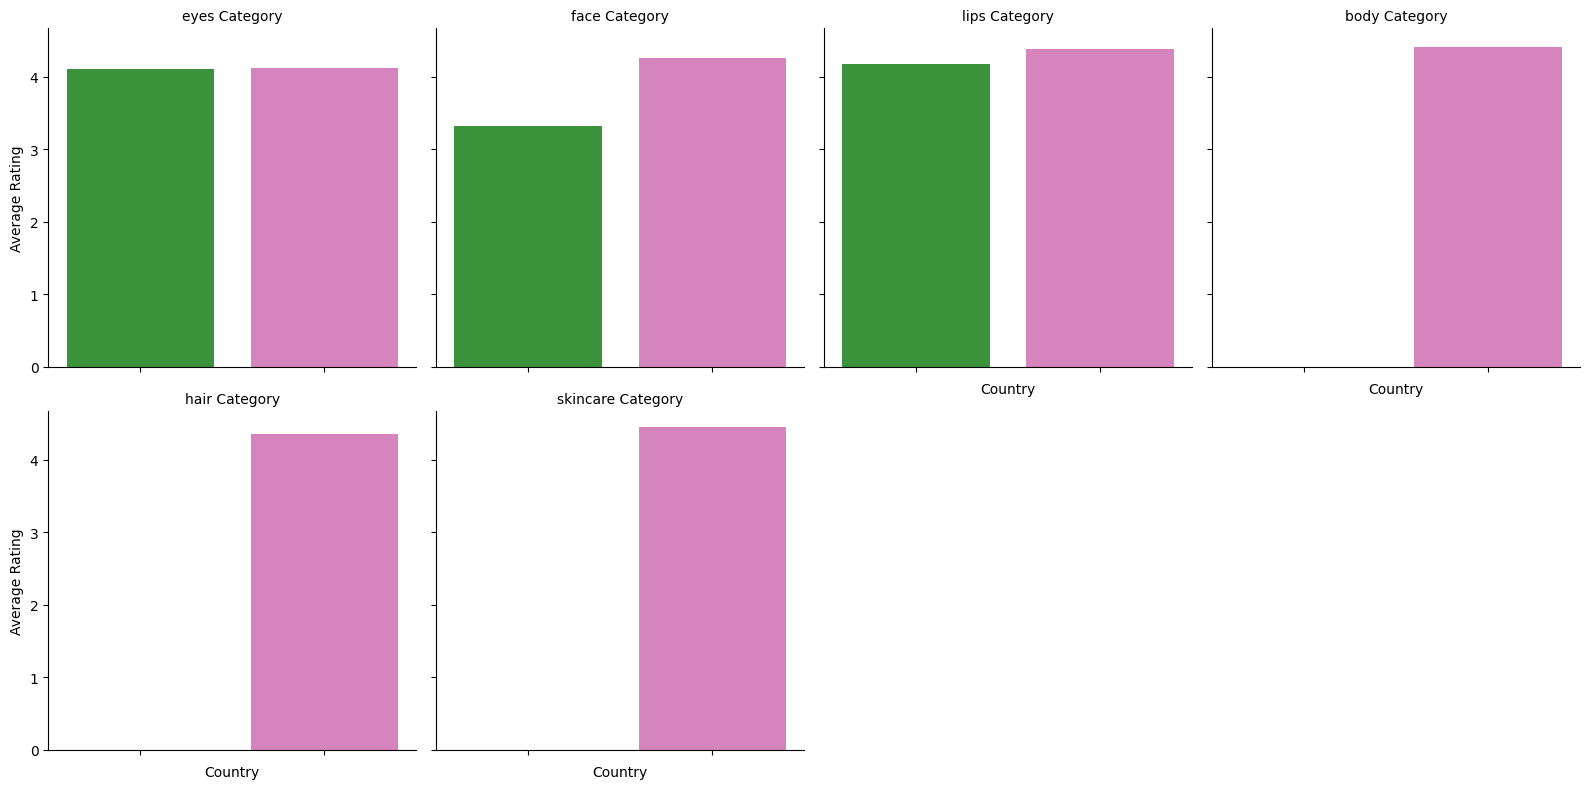

In [ ]:
g = sns.FacetGrid(rating_by_country_category, col="category", col_wrap=4, height=4)
g.map(sns.barplot, 'country', 'rating', order=rating_by_country_category['country'].unique(), palette=['#2ca02c', '#e377c2'])
g.set_axis_labels('Country', 'Average Rating')
g.set_titles("{col_name} Category")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()



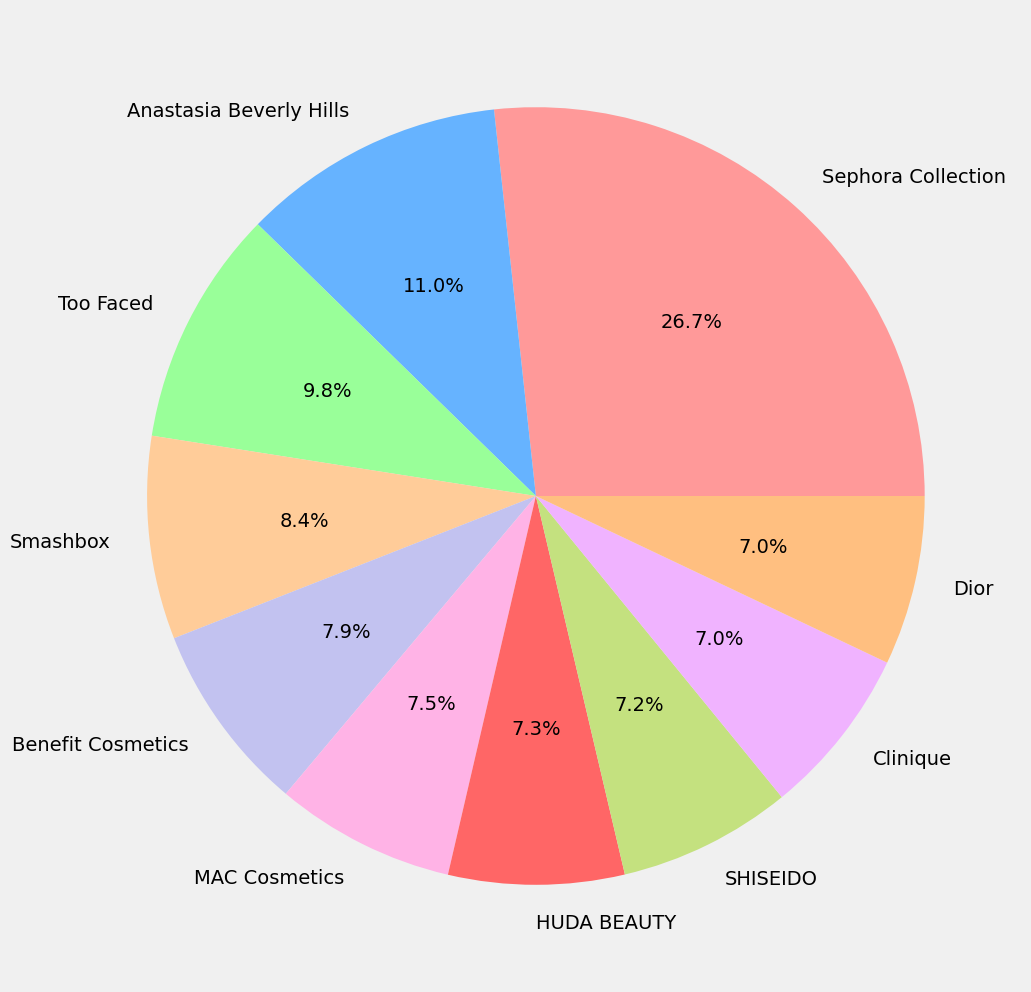

In [ ]:
#Top 10

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c4e17f', '#f0b3ff', '#ffbf80']

brand_values=df['brand'].value_counts().head(10)
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,12))
plt.pie(brand_values,labels=brand_values.index,autopct="%1.1f%%", colors=colors)
plt.show()